In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [251]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [252]:
img = cv2.imread('./test_image/mariasarapova1.jpg')


In [253]:
img.shape

(1099, 736, 3)

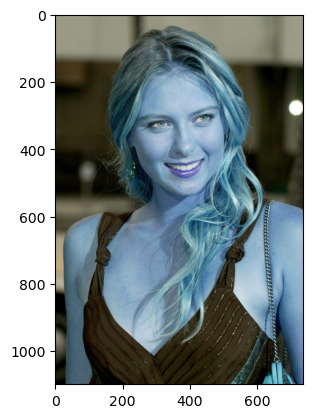

In [254]:
plt.imshow(img)

In [255]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1099, 736)

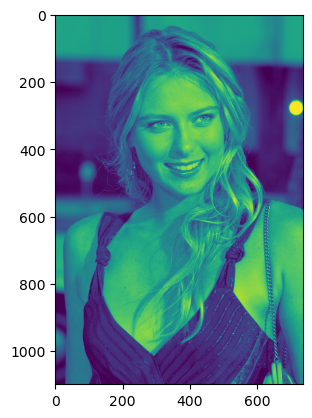

In [256]:
plt.imshow(gray)

In [257]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [258]:
faces

array([[210, 190, 334, 334]])

In [259]:
x, y, w, h = faces[0]
x, y, w, h

(210, 190, 334, 334)

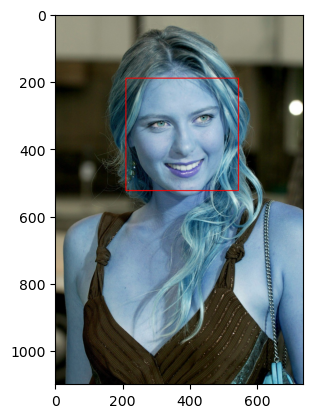

In [260]:
cv2.destroyAllWindows()
face_img = cv2.rectangle(img, (x, y), (x + w, y+ h), (250, 0, 0),2)
plt.imshow(face_img)

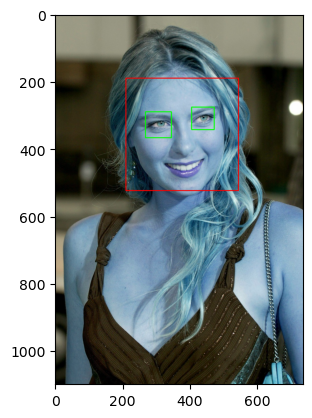

In [261]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 2)

        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

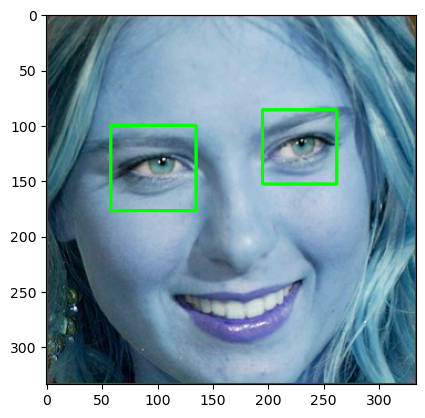

In [262]:
%matplotlib inline
plt.imshow(roi_color, cmap=  'gray')

In [249]:
cropped_img = np.array(roi_color)
roi_color.shape

(334, 334, 3)

In [244]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

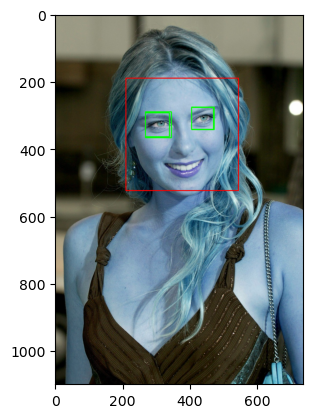

In [245]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 2)

        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

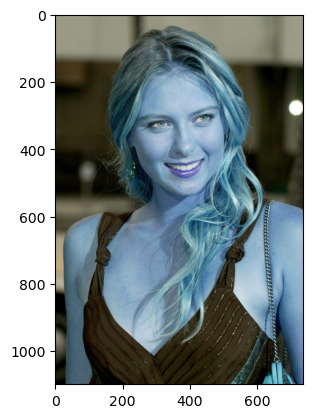

In [156]:
original_img = cv2.imread('./test_image/mariasarapova1.jpg')
plt.imshow(original_img)

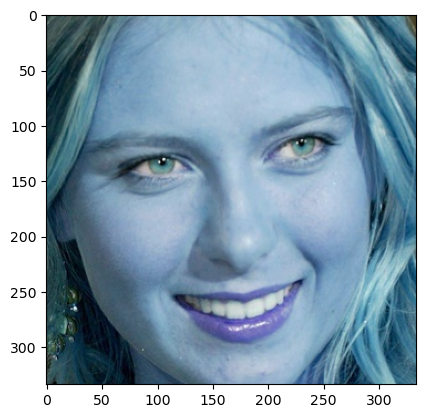

In [220]:
cropped_img = get_cropped_image_if_2_eyes('./test_image/mariasarapova1.jpg')
plt.imshow(cropped_img)

In [222]:
crop2 = get_cropped_image_if_2_eyes('./test_image/mariasarapova2.jpg')
crop2

In [223]:
path_to_data = "./dataset/"
path_to_cr_data =  "./dataset/cropped/"


In [673]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir:
        img_dirs.append(entry.path)

In [674]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [675]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmdir(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [687]:
cropped_image_dirs = []
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_croped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1
        

In [694]:
cropped_image_dirs

['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federer',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [677]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

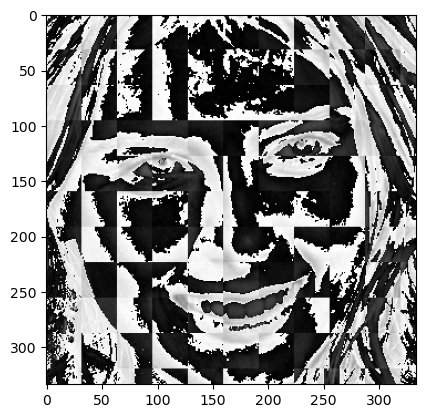

In [678]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [697]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = [] 
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list


In [698]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [700]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict


{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [707]:
X = []
y = []
for celebrity_name, training_file in celebrity_file_names_dict.items():
    for traing_image in training_file:
        img = cv2.imread(traing_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combining_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3,  1), scalled_img_har.reshape(32 * 32, 1)))
        X.append(combining_img)
        y.append(class_dict[celebrity_name])
        

In [713]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(161, 4096)

In [717]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 

In [733]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8780487804878049

In [735]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92         6
           3       1.00      0.67      0.80         6
           4       0.71      1.00      0.83        10

    accuracy                           0.88        41
   macro avg       0.91      0.87      0.88        41
weighted avg       0.91      0.88      0.88        41



In [742]:
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [823]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1, 10, 100],
            'svc__kernel': ['rbf', 'linear']
        }
    
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 20]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params':{
            'logisticregression__C': [1, 5, 20, 50]
        }
    }
}

In [824]:
scores = []
best_estimator = {}
for mdl, prm in model_params.items():
    pipe = make_pipeline(StandardScaler(), prm['model'])
    gscv = GridSearchCV(pipe, prm['params'], cv = 5, return_train_score= False)
    gscv.fit(x_train, y_train)
    
    scores.append({
        'model':  mdl,
        'best_score': gscv.best_score_, 
        'best_params': gscv.best_params_
    })
    best_estimator = gscv.best_estimator_



In [825]:
dff = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
dff


,model,best_score,best_params
0,svm,0.858333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.750000,{'randomforestclassifier__n_estimators': 20}
2,logistic_regression,0.866667,{'logisticregression__C': 1}


In [826]:
best_estimator

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [827]:
best_estimators['svm'].score(x_test,y_test)

0.926829268292683

In [828]:
best_estimators['random_forest'].score(x_test,y_test)

0.7073170731707317

In [830]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9512195121951219

In [839]:
best_model = best_estimators['logistic_regression']

In [840]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_model.predict(x_test))

In [841]:
cm

array([[ 7,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  1,  1,  4,  0],
       [ 0,  0,  0,  0, 10]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

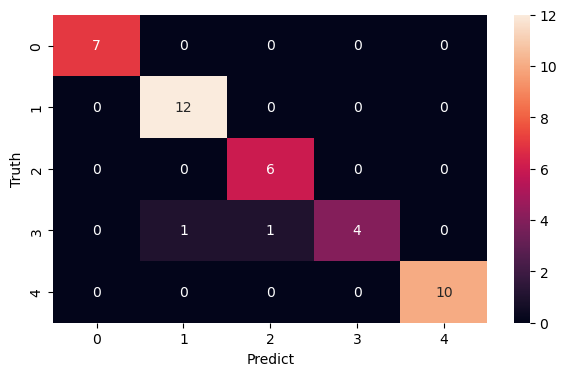

In [846]:
import seaborn as sn
plt.figure(figsize = (7, 4))
sn.heatmap(cm, annot = True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [847]:
import joblib
joblib.dump(best_model, 'saved_model.pkl')

['saved_model.pkl']

In [850]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict)) ## the spelling of dump and dumps are making me dumb